In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/termfrequencyidfoutputmain.xlsx')

# Now you can work with the DataFrame as needed
print(df.head())  # Print the first few rows of the DataFrame

    fitting      time     floor   setting    result   support     water  \
0  0.003381  0.005527  0.001845  0.003685  0.002859  0.001842  0.003116   
1  0.000000  0.006298  0.004203  0.004198  0.003258  0.002099  0.003551   
2  0.003806  0.006222  0.002077  0.004148  0.003219  0.002074  0.003508   
3  0.003642  0.005955  0.001987  0.003970  0.003080  0.001985  0.000000   
4  0.003426  0.005602  0.001869  0.003734  0.002898  0.001867  0.000000   

     number      test    listed  ...   coating   shading  reflective  \
0  0.003689  0.002848  0.001845  ...  0.000000  0.000000    0.000000   
1  0.002102  0.003245  0.002102  ...  0.003673  0.003673    0.003673   
2  0.004153  0.003206  0.002077  ...  0.000000  0.000000    0.000000   
3  0.003975  0.003068  0.001987  ...  0.000000  0.000000    0.000000   
4  0.003739  0.002886  0.001869  ...  0.003267  0.003267    0.003267   

    measure     local      loft    source   turbine  emission rate  \
0  0.000000  0.000000  0.000000  0.000000  0.0

In [ ]:
# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Check if missing values have been imputed
print("Number of missing values in each column after imputation:")
print(df_imputed.isnull().sum())

Number of missing values in each column after imputation:
fitting             0
time                0
floor               0
setting             0
result              0
                   ..
loft                0
source              0
turbine             0
emission rate       0
consumption rate    0
Length: 143, dtype: int64


# **Mutual Info Feature Selection Algorithm**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset into a Pandas DataFrame
# Replace 'data.csv' with your actual data file
df_imputed = pd.read_excel('/content/drive/MyDrive/termfrequencyidfoutputmain.xlsx')

# Assuming 'target' is the column you want to predict
X = df_imputed.drop('consumption rate', axis=1)  # Features
y = df_imputed['consumption rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Mutual Information
num_features_to_select = 5  # You can adjust this value as needed
mi_selector = SelectKBest(mutual_info_regression, k=num_features_to_select)
X_train_selected = mi_selector.fit_transform(X_train, y_train)
X_test_selected = mi_selector.transform(X_test)

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 37543.43173702167
R-squared: 0.5250434093872807
Root Mean Squared Error: 193.76127512230525


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset into a Pandas DataFrame
# Replace 'data.csv' with your actual data file
df_imputed = pd.read_excel('/content/drive/MyDrive/termfrequencyidfoutputmain.xlsx')

# Assuming 'target' is the column you want to predict
X = df_imputed.drop('consumption rate', axis=1)  # Features
y = df_imputed['consumption rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Lasso regression model
alpha = 0.01  # L1 regularization strength, adjust as needed
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Get selected features
selected_features = [feature for feature, coef in zip(df_imputed, lasso.coef_) if coef != 0]
print("Selected Features:", selected_features)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Selected Features: ['fitting', 'floor', 'number', 'replacing', 'unit', 'insulated', 'low', 'heating', 'efficiency', 'air', 'property', 'lighting', 'solar', 'report', 'wall', 'designbuilder', 'ventilation', 'local', 'loft', 'emission rate']
Mean Squared Error: 38175.16621396502
R-squared: 0.5170514267831532


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/Mainbinaryoutput (2).xlsx')

# Now you can work with the DataFrame as needed
print(df.head())  # Print the first few rows of the DataFrame

   friday  see  fitting  ls11  time  helpdesk  floor  setting  kitching  \
0       1    1        1     1     1         1      1        1         1   
1       1    1        0     0     1         1      1        1         0   
2       1    1        1     0     1         1      1        1         0   
3       1    1        1     0     1         1      1        1         0   
4       1    1        1     0     1         1      1        1         0   

   result  ...  chimney  sealing  turbine  transaction  organisation  \
0       1  ...        0        0        0            0             0   
1       1  ...        0        0        0            0             0   
2       1  ...        0        0        1            0             0   
3       1  ...        0        0        0            0             0   
4       1  ...        0        0        0            0             0   

   equivalent  biomass  boiler  emission rate  consumption rate  
0           0        0       0         112.58     

In [ ]:
# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Check if missing values have been imputed
print("Number of missing values in each column after imputation:")
print(df_imputed.isnull().sum())

Number of missing values in each column after imputation:
friday              0
see                 0
fitting             0
ls11                0
time                0
                   ..
equivalent          0
biomass             0
boiler              0
emission rate       0
consumption rate    0
Length: 268, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset into a Pandas DataFrame
# Replace 'data.csv' with your actual data file
df_imputed = pd.read_excel('/content/drive/MyDrive/Mainbinaryoutput (2).xlsx')

# Assuming 'target' is the column you want to predict
X = df_imputed.drop('consumption rate', axis=1)  # Features
y = df_imputed['consumption rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Mutual Information
num_features_to_select = 5  # You can adjust this value as needed
mi_selector = SelectKBest(mutual_info_regression, k=num_features_to_select)
X_train_selected = mi_selector.fit_transform(X_train, y_train)
X_test_selected = mi_selector.transform(X_test)

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Root Mean Squared Error: 194.30520861132237
Mean Squared Error: 37754.5140934895
R-squared: 0.5223730366555412


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Load your dataset into a Pandas DataFrame
# Replace 'data.csv' with your actual data file
df_imputed = pd.read_excel('/content/drive/MyDrive/Mainbinaryoutput (2).xlsx')

# Assuming 'target' is the column you want to predict
X = df_imputed.drop('consumption rate', axis=1)  # Features
y = df_imputed['consumption rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Correlation-based Feature Selection (CFS)
num_features_to_select = 5  # You can adjust this value as needed
cfs_selector = SelectKBest(f_regression, k=num_features_to_select)
X_train_selected = cfs_selector.fit_transform(X_train, y_train)
X_test_selected = cfs_selector.transform(X_test)

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Root Mean Squared Error: 195.50405551689403
Mean Squared Error: 38221.83572355279
R-squared: 0.5164610174856057


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/termfrequencymainoutput (1).xlsx')

# Now you can work with the DataFrame as needed
print(df.head())  # Print the first few rows of the DataFrame

    fitting      time     floor   setting    result   support     water  \
0  0.002660  0.007979  0.002660  0.005319  0.002660  0.002660  0.002660   
1  0.000000  0.009091  0.006061  0.006061  0.003030  0.003030  0.003030   
2  0.002994  0.008982  0.002994  0.005988  0.002994  0.002994  0.002994   
3  0.002865  0.008596  0.002865  0.005731  0.002865  0.002865  0.000000   
4  0.002695  0.008086  0.002695  0.005391  0.002695  0.002695  0.000000   

     number      test    listed  ...  reflective   measure     local  \
0  0.005319  0.002660  0.002660  ...    0.000000  0.000000  0.000000   
1  0.003030  0.003030  0.003030  ...    0.003030  0.003030  0.000000   
2  0.005988  0.002994  0.002994  ...    0.000000  0.000000  0.002994   
3  0.005731  0.002865  0.002865  ...    0.000000  0.000000  0.000000   
4  0.005391  0.002695  0.002695  ...    0.002695  0.002695  0.000000   

       loft    poorly    source   turbine   boiler  emission rate  \
0  0.000000  0.002660  0.000000  0.000000  0.00

In [ ]:
# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Check if missing values have been imputed
print("Number of missing values in each column after imputation:")
print(df_imputed.isnull().sum())

Number of missing values in each column after imputation:
fitting             0
time                0
floor               0
setting             0
result              0
                   ..
source              0
turbine             0
boiler              0
emission rate       0
consumption rate    0
Length: 151, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset into a Pandas DataFrame
# Replace 'data.csv' with your actual data file
df_imputed = pd.read_excel('/content/drive/MyDrive/termfrequencymainoutput (1).xlsx')

# Assuming 'target' is the column you want to predict
X = df_imputed.drop('consumption rate', axis=1)  # Features
y = df_imputed['consumption rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Mutual Information
num_features_to_select = 5  # You can adjust this value as needed
mi_selector = SelectKBest(mutual_info_regression, k=num_features_to_select)
X_train_selected = mi_selector.fit_transform(X_train, y_train)
X_test_selected = mi_selector.transform(X_test)

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Root Mean Squared Error: 194.2268509668628
Mean Squared Error: 37724.06963650393
R-squared: 0.5227581851308913


# **Data Visualization of Results**

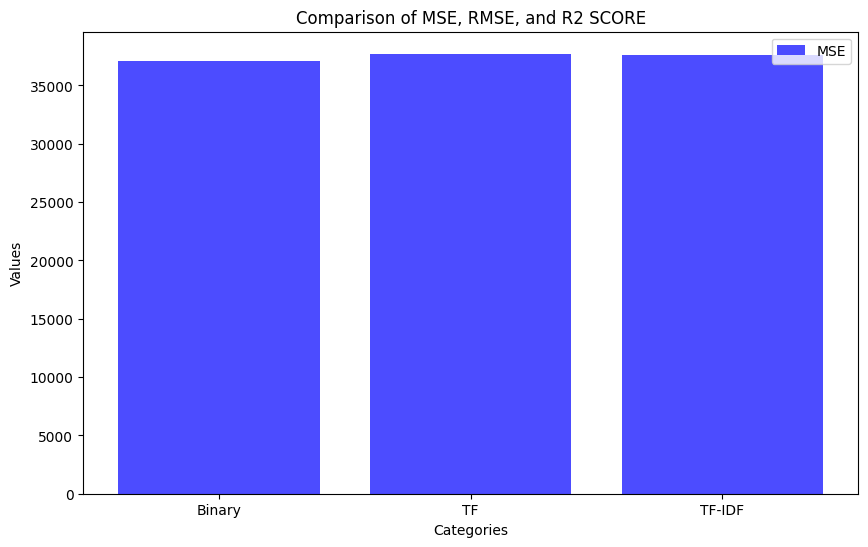

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Binary', 'TF', 'TF-IDF']
mse_values = [37124.20062638302, 37724.06963650393, 37587.10621359041]
rmse_values = [192.6764142970878, 194.2268509668628, 193.87394413275447]
r2_score_values = [0.53, 0.52, 0.52]

# Create a bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(categories, mse_values, color='blue', alpha=0.7, label='MSE')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of MSE, RMSE, and R2 SCORE')
plt.legend()

# Show the plot
plt.show()


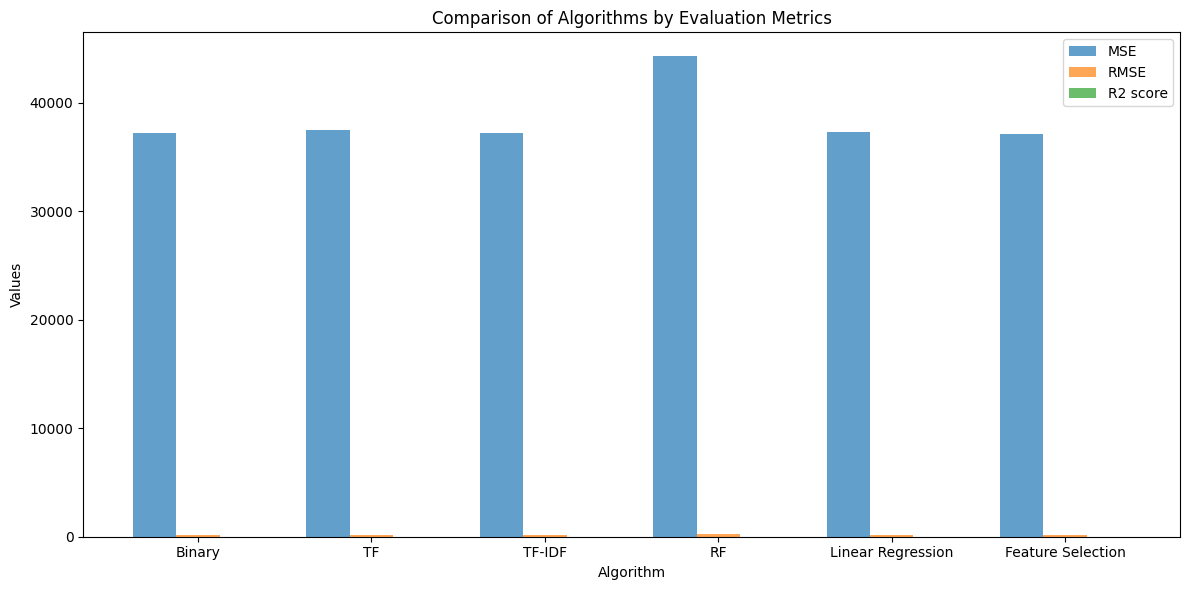

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Binary', 'TF', 'TF-IDF', 'RF', 'Linear Regression', 'Feature Selection']
metrics = ['MSE', 'RMSE', 'R2 score']

# Values
data = {
    'Binary': {
        'MSE': 37191.635208348605,
        'RMSE': 192.85132928851854,
        'R2 score': 0.53,
    },
    'TF': {
        'MSE': 37431.28654528587,
        'RMSE': 193.47166858557318,
        'R2 score': 0.53,
    },
    'TF-IDF': {
        'MSE': 37194.652287086494,
        'RMSE': 192.85915142166962,
        'R2 score': 0.52,
    },
    'RF': {
        'MSE': 44257.05053846779,
        'RMSE': 210.37359753179055,
        'R2 score': 0.44,
    },
    'Linear Regression': {
        'MSE': 37321.905007630725,
        'RMSE': 193.18878074989428,
        'R2 score': 0.53,
    },
    'Feature Selection': {
        'MSE': 37124.20062638302,
        'RMSE': 192.6764142970878,
        'R2 score': 0.52,
    },
}

# Create a grouped bar chart
bar_width = 0.25
index = np.arange(len(categories))
opacity = 0.7

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    values = [data[category][metric] if metric in data[category] else 0 for category in categories]
    plt.bar(index + i * bar_width, values, bar_width, alpha=opacity, label=metric)

plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Comparison of Algorithms by Evaluation Metrics')
plt.xticks(index + bar_width, categories)
plt.legend()

plt.tight_layout()
plt.show()


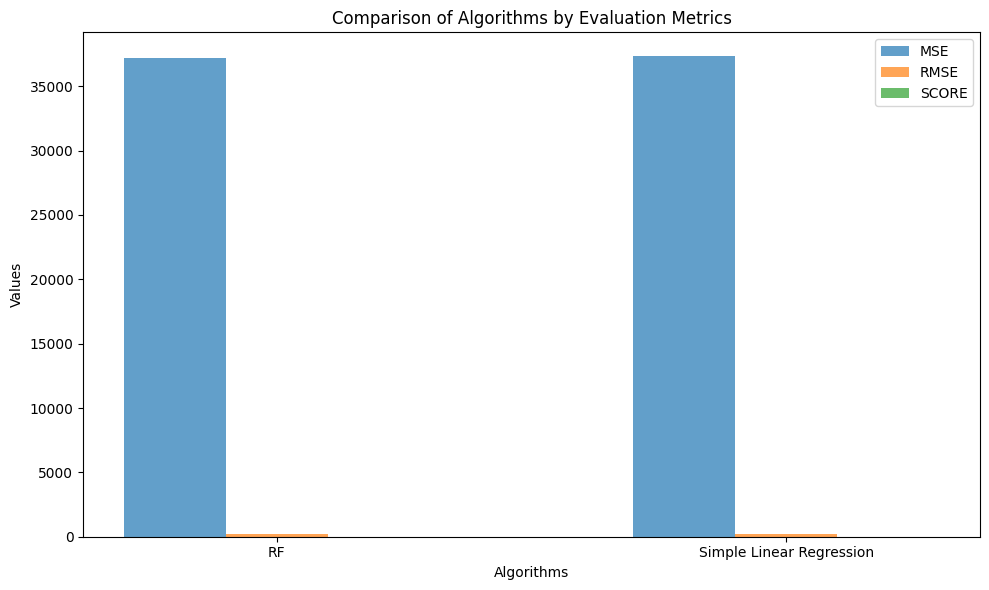

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['RF', 'Simple Linear Regression']
metrics = ['MSE', 'RMSE', 'SCORE']

# Values
data = {
    'RF': {
        'MSE': 37194.652287086494,
        'RMSE': 192.85915142166962,
        'SCORE': 0.52,
    },
    'Simple Linear Regression': {
        'MSE': 37321.90500762667,
        'RMSE': 193.1887807498838,
        'SCORE': 0.53,
    },
}

# Create a bar chart
bar_width = 0.2
index = np.arange(len(algorithms))
opacity = 0.7

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    values = [data[algorithm][metric] if metric in data[algorithm] else 0 for algorithm in algorithms]
    plt.bar(index + i * bar_width, values, bar_width, alpha=opacity, label=metric)

plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Comparison of Algorithms by Evaluation Metrics')
plt.xticks(index + bar_width, algorithms)
plt.legend()

plt.tight_layout()
plt.show()


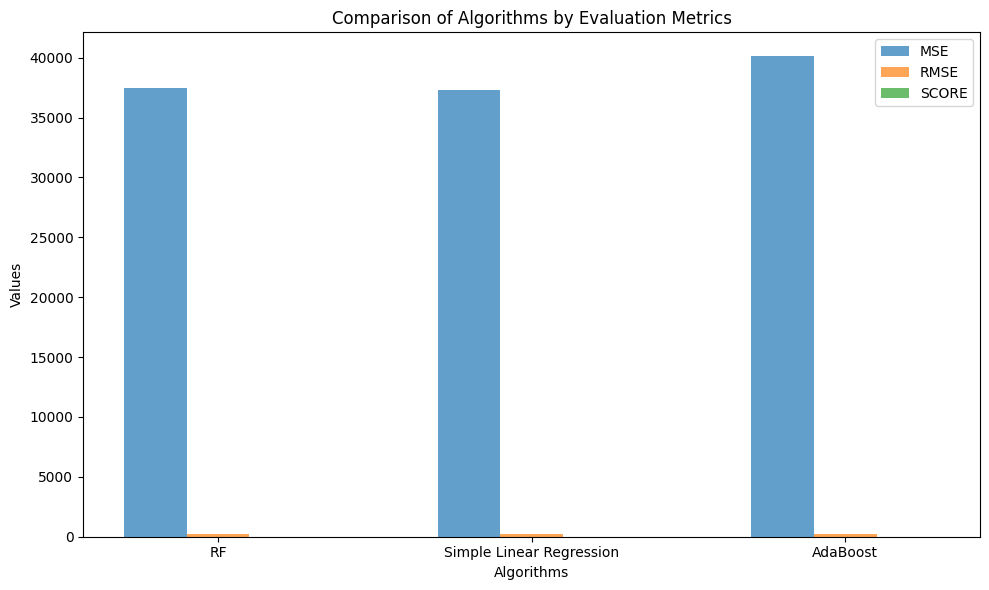

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['RF', 'Simple Linear Regression', 'AdaBoost']
metrics = ['MSE', 'RMSE', 'SCORE']

# Values
data = {
    'RF': {
        'MSE': 37431.28654528587,
        'RMSE': 193.47166858557318,
        'SCORE': 0.53,
    },
    'Simple Linear Regression': {
        'MSE': 37321.905007630725,
        'RMSE': 193.18878074989428,
        'SCORE': 0.53,
    },
    'AdaBoost': {
        'MSE': 40105.83339965372,
        'RMSE': 200.26440871920732,
        'SCORE': 0.49,
    },
}

# Create a bar chart
bar_width = 0.2
index = np.arange(len(algorithms))
opacity = 0.7

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    values = [data[algorithm][metric] if metric in data[algorithm] else 0 for algorithm in algorithms]
    plt.bar(index + i * bar_width, values, bar_width, alpha=opacity, label=metric)

plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Comparison of Algorithms by Evaluation Metrics')
plt.xticks(index + bar_width, algorithms)
plt.legend()

plt.tight_layout()
plt.show()


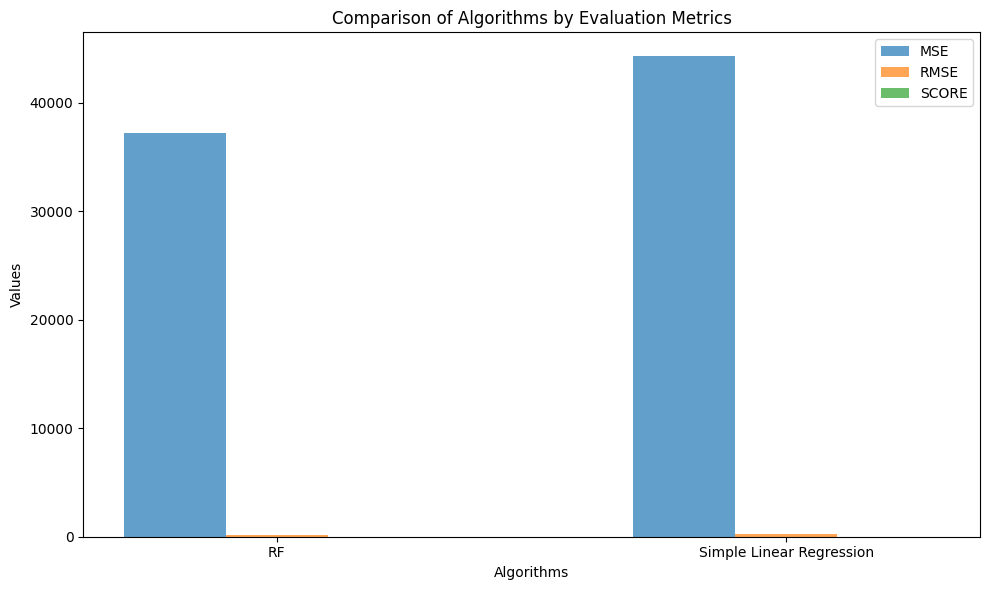

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['RF', 'Simple Linear Regression']
metrics = ['MSE', 'RMSE', 'SCORE']

# Values
data = {
    'RF': {
        'MSE': 37191.635208348605,
        'RMSE': 192.85132928851854,
        'SCORE': 0.53,
    },
    'Simple Linear Regression': {
        'MSE': 44257.05053846779,
        'RMSE': 210.37359753179055,
        'SCORE': 0.44,
    },
}

# Create a bar chart
bar_width = 0.2
index = np.arange(len(algorithms))
opacity = 0.7

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    values = [data[algorithm][metric] if metric in data[algorithm] else 0 for algorithm in algorithms]
    plt.bar(index + i * bar_width, values, bar_width, alpha=opacity, label=metric)

plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Comparison of Algorithms by Evaluation Metrics')
plt.xticks(index + bar_width, algorithms)
plt.legend()

plt.tight_layout()
plt.show()
